# Building a binary classification model using Deep Neural Networks

In this tutorial you will learn :
* How to apply different techniques learnt in *Intro to MLP Notebook*.
* How to increase the accuracy of the model.
* Play with Hyperparameters to see how it effects the model's performance.

## Importing and Pre-processing the Dataset

We will follow the same steps which was followed in the prevoius notebook *Day5_MLP_HousePricePrediction_Project*.
So feel free to skip the below 2 code cells

In [ ]:
import pandas as pd                      #This means that I want to refer to code in the package ‘pandas’, by referring to it with the name pd
from sklearn import preprocessing         #This means I want to use the code in ‘preprocessing’ within the sklearn package
from sklearn.model_selection import train_test_split    #used to split the data into training and testing from sklearn 
from keras.models import Sequential     # imorting the sequential  from keras library. 
from keras.layers import Dense            #importing dense model from keras
from sklearn.model_selection import train_test_split   #used to split the data into training and testing
import tensorflow as tf

In [ ]:
df = pd.read_csv('housepricedata.csv')    #This means that we will read the csv file ‘housepricedata.csv’ and store it in the variable ‘df’

dataset = df.values
X = dataset[:,0:10]
Y = dataset[:,10]
        
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)  #your val_and_test size will be 30% of the overall dataset.
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)  # to see the dimension of each variable

#  Define DNN keras 

Time to apply all the techniques like regularization, dropout, batch normalization!

In [ ]:
model = tf.keras.Sequential([                                                                            #1
        tf.keras.layers.Dense(32, activation='relu'),                                                    #2
        tf.keras.layers.BatchNormalization(axis=-1, epsilon=0.001),                                      #3
        tf.keras.layers.Dropout(0.3),                                                                    #4
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)), #5
        tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),                       #6
        tf.keras.layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),#7
        tf.keras.layers.BatchNormalization(axis=-1, epsilon=0.001),                                      #8
        tf.keras.layers.Dropout(0.3),                                                                    #9
        tf.keras.layers.Dense(1, activation = 'sigmoid')                                                                         #10
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.002)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics='accuracy')

Let's decode the architecture written above!

*  tf.keras.Sequential #1 : Just like previous model, all the layers will be executed i.e in the order they are defined.

*  tf.keras.layers.Dense #2 : This has 32 neurons and *relu* as it's activation function, also considered as *Input Layer*.

*   tf.keras.layers.BatchNormalization #3 : You normalize along the columns,as it represents featues of all data points, remember the $\epsilon$ in the denominator of $zn$ equation, well that is set to *0.001*.

*  tf.keras.layers.Dropout #4 : This implements the dropout method covered in the Regularization topic, 0.3 indicates 30% of neurons that should be shut off while training for one epoch.

* tf.keras.layers.Dense #5 : This uses the *l2* regularization , note that *L2* is not because we do not have a sparse Dataset.

Now the same layers are declared with different parameters from #6 till #9.<br>

* In the last Dense layer note that only 1 neuron is used whose output is the probability of the house price being above the median or not ( 1 or 0). Sigmoid activation is used to squash the values between 0 and 1, so that it can be interpreted as probability.


* Here we have used RMSProp as our optimizer, with learning rate = 0.002

* Loss is binary crossentropy, this is preferred because this a convex function, hence giving only one global minima.


#  Training your model

The two major hyperparameters to look out for in model.fit():


batch_size = As you learnt in optimizers that *mini batch algorithm* helps the model converge faster, so we will divide the whole dataset into smaller batches. 

For example, in this Dataset we have 1460 examples, we can create batches of 16,32,64 i.e our dataset will have $1460/32$(I have choosen 32 here).Therefore the algorithm dosen't have to wait till the whole dataset is passed through the model to take a sigle step.

*Tip* : Choose your *batch_size* to be a multiple of two so that the computation speed increases. This happens because of the architecture of the running hardware.

epochs = how many times do you want pass the whole dataset through the network i.e all 1460 points through the model.

In [ ]:

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

model.summary() #provides number of parameters to be learned and other crucial informations on dimension of each layers

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2620 - accuracy: 0.8982 - val_loss: 0.1926 - val_accuracy: 0.9269
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.9002 - val_loss: 0.2093 - val_accuracy: 0.9224
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2636 - accuracy: 0.8992 - val_loss: 0.2097 - val_accuracy: 0.9132
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2296 - accuracy: 0.9129 - val_loss: 0.2125 - val_accuracy: 0.9178
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.9022 - val_loss: 0.2246 - val_accuracy: 0.9132
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2538 - accuracy: 0.9002 - val_loss: 0.2155 - val_accuracy: 0.9132
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2287 - accuracy: 0.9139 - val_loss: 0.2092 - val_accuracy: 0.9269
Epoch 8/100
3

We can clearly see that both training and validation accuracy has increased due to DNN compared to simple NN.<br> Training acuracy upto : 92.56%<br> 
Validation accuracy upto : 93.61%

Play around with Hyperparameters : vary no of neurons, epsilon value, no of layers and see how that effects the accuracy.

# 5. Evaluate keras model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

In [ ]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.9224


0.922374427318573

It is notable that test data performance has increased witha good margin from 86.76% till 92.24%.

You might think just to increase accuracy by few % why such a huge architecture, but even the slightest increase will help the model perform better in real-time, eliminate bias if learnt. 

In [ ]:
# Lets decrease one layer and see the effect
model_1 = tf.keras.Sequential([                                                                          #1
        tf.keras.layers.Dense(32, activation='relu'),                                                    #2
        tf.keras.layers.BatchNormalization(axis=-1, epsilon=0.001),                                      #3
        tf.keras.layers.Dropout(0.3),                                                                    #4
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)), #5
        tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),                       #6
        tf.keras.layers.Dense(1)                                                                         #7
]) 
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.002)
model_1.compile(loss='binary_crossentropy', optimizer=optimizer,metrics='accuracy')

In [ ]:

model_1.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

model_1.summary() #provides number of parameters to be learned and other crucial informations on dimension of each layers

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5311 - accuracy: 0.8806 - val_loss: 0.2745 - val_accuracy: 0.8950
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.8826 - val_loss: 0.2715 - val_accuracy: 0.9178
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4110 - accuracy: 0.8787 - val_loss: 0.2059 - val_accuracy: 0.9178
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4477 - accuracy: 0.8689 - val_loss: 0.2142 - val_accuracy: 0.9041
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.8748 - val_loss: 0.2055 - val_accuracy: 0.9132
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.8826 - val_loss: 0.2075 - val_accuracy: 0.9087
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3997 - accuracy: 0.8855 - val_loss: 0.2898 - val_accuracy: 0.9132
Epoch 8/100
3

In [ ]:
# Lets change the optimizer to adam and see
model_2 = tf.keras.Sequential([                                                                          #1
        tf.keras.layers.Dense(32, activation='relu'),                                                    #2
        tf.keras.layers.BatchNormalization(axis=-1, epsilon=0.001),                                      #3
        tf.keras.layers.Dropout(0.3),                                                                    #4
        tf.keras.layers.Dense(64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)), #5
        tf.keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001),                       #6
        tf.keras.layers.Dense(1)                                                                         #7
]) 

model_2.compile(loss='binary_crossentropy', optimizer='adam',metrics='accuracy')

In [ ]:

model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

model_2.summary() #provides number of parameters to be learned and other crucial informations on dimension of each layers

Epoch 1/100
32/32 [==============================] - 1s 9ms/step - loss: 4.3544 - accuracy: 0.5877 - val_loss: 0.7702 - val_accuracy: 0.5160
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 2.2949 - accuracy: 0.7582 - val_loss: 0.6981 - val_accuracy: 0.5753
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4080 - accuracy: 0.7495 - val_loss: 0.6614 - val_accuracy: 0.6164
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4166 - accuracy: 0.7624 - val_loss: 0.6510 - val_accuracy: 0.6438
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1525 - accuracy: 0.7757 - val_loss: 0.6199 - val_accuracy: 0.6895
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0226 - accuracy: 0.7933 - val_loss: 0.7868 - val_accuracy: 0.7489
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 1.6716 - accuracy: 0.8297 - val_loss: 1.1611 - val_accuracy: 0.7763
Epoch 8/100
3

# Making predictions
We can adapt the above example and use it to generate predictions on the training dataset, pretending it is a new dataset 

In [ ]:
predictions = model.predict(X)  # using the model to predict on training data i.e. x and 
                                # storing it in the variable "predictions"
                                
predictions[:5]    #viewing only the first 5 model predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

# 7. Visualization  

## 7.1 Traing loss and validation loss

The below video will give you a clear idea of what loss function does.

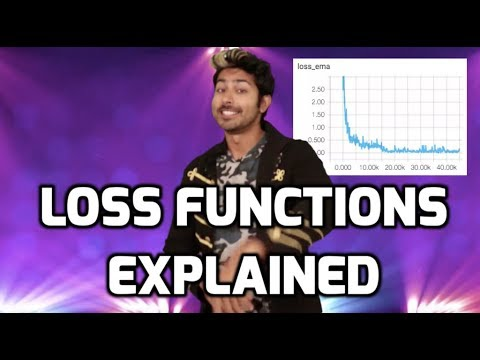

In [ ]:
#@title 
from IPython.display import YouTubeVideo
YouTubeVideo('IVVVjBSk9N0')

Now that you know loss function is basically a penalty for the model to learn from it's uncorrect predictions, from the below graph we want to know how fast is the model learning, that it's loss function should decrease in each epoch.

You cannot expect in every epoch the loss has to reduce, sometimes it might even increase due to *outliers* in the Datasets. However a good model average loss over a period of time will decrease with increasing epoch.



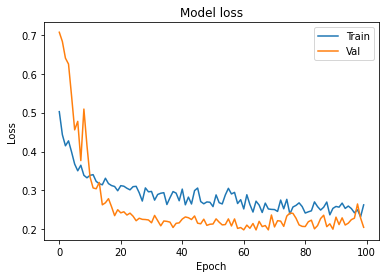

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Yoou can see that in early epoch till ~15 the loss decreases exponentially, because initially the model will have random numbers as it's weights so there isa lot of scope for the model to learn, as the epoch increases and have reached decent performances then the rate of loss function decreases as evident in the above graph.

Note  : 

Due to big enough architecture the model was quickly able to learn any complex relations in less number of epochs

## Training accuracy and validation accuracy

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:
$$ Accuracy = \frac{ TN + TP}{TP+TN+FP+FN}$$

Where TP = True Positives, TN = True Negatives, FP = False Positives, and FN = False Negatives.

There are 4 important terms :<br>
True Positives : The cases in which we predicted YES and the actual output was also YES.<br>
True Negatives : The cases in which we predicted NO and the actual output was NO.<br>
False Positives : The cases in which we predicted YES and the actual output was NO.<br>
False Negatives : The cases in which we predicted NO and the actual output was YES.

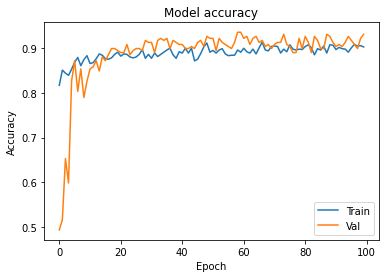

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

It's intutive to expect that accuracy should increase by every epoch, from the graph it is evident that for initial epochs accuracy rapidly increases with a steep slope and as epochs increases the accuracy has reached a saturation level, indicating the model has reached it's maximum learnin capacity.